### Hypothesis Generation
This is a very pivotal step in the process of analyzing data. 
This involves understanding the problem and making some hypothesis about what could potentially have a good impact on 
the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis
which we can potentially perform if data is available. 

### The Problem Statement
> The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

#### So the idea is to find out the properties of products and stores which impacts the sales of a product.

## The Hypotheses

<div class="alert alert-block ">
<b>Store Level Hypotheses:</b>
    
<ul>
    <li><b>City type :</b> Big cities will have higher sales</li>
    <li><b>Population Density :</b> Store located in high density wll have higher Sales</li>
    <li><b>Store Capacity:</b> Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place</li>
</ul>
</div>

<div class="alert alert-block ">
<b>Product Level Hypotheses:</b>
    
<ul>
<li><b>Brand:</b> Branded products should have higher sales because of higher trust in the customer.</li>
<li><b>Packaging:</b> Products with good packaging can attract customers and sell more.</li>
<li><b>Utility:</b> Daily use products should have a higher tendency to sell as compared to the specific use products.</li>
<li><b>Display Area:</b> Products which are given bigger shelves in the store are likely to catch attention first and sell more.</li>
<li><b>Visibility in Store:</b> The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.</li>
    
</ul>
</div>

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('Train_UWu5bXk.txt')
test = pd.read_csv('Test_u94Q5KV.txt')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
train['source'] = 'train'
test['source'] = 'test'

In [4]:
train.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
4338,FDH21,NaN,Low Fat,0.031074,Seafood,157.5604,OUT027,1985,Medium,Tier 3,Supermarket Type3,5704.5744,train


In [5]:
bigmart_data = pd.concat([train,test],ignore_index = True,sort=True)

In [6]:
bigmart_data.sample(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
8138,Regular,FDV01,155.4314,3568.0222,Canned,0.085123,19.20,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
4935,LF,NCP06,152.8366,2569.3222,Household,0.039238,20.70,2004,OUT035,Tier 2,Small,Supermarket Type1,train
9909,Regular,FDA35,123.2072,NaN,Baking Goods,0.054057,14.85,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
5081,Regular,FDT50,96.3752,1342.2528,Dairy,0.108219,6.75,2004,OUT035,Tier 2,Small,Supermarket Type1,train
6355,Regular,FDC22,193.9820,1737.7380,Snack Foods,0.136428,6.89,1997,OUT046,Tier 1,Small,Supermarket Type1,train


In [7]:
print((bigmart_data.shape,test.shape,train.shape))

((14204, 13), (5681, 12), (8523, 13))


## Performing EDA

In [8]:
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


### Since Item_Outlet_Sales is our predicted column hence it will contain only 8523 records and 5681 records will be null for testing

In [9]:
bigmart_data.apply(lambda x : sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

### Outlet_Size and Item_Weight contain null values                                  

In [10]:
bigmart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


### Item_Visibility cannt be zero 

### Outlet_Establishment_Yearranges from 1985 to 2009

### Moving to Nomila columns

In [11]:
bigmart_data.select_dtypes(include=['object']).nunique()

Item_Fat_Content           5
Item_Identifier         1559
Item_Type                 16
Outlet_Identifier         10
Outlet_Location_Type       3
Outlet_Size                3
Outlet_Type                4
source                     2
dtype: int64

In [12]:
categorical_columns = [x for x in bigmart_data.dtypes.index if bigmart_data.dtypes[x] =='object' and x not in ['Item_Identifier','source']]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [13]:
for column in categorical_columns :
    print('\Frequency of Categories for varible is',column)
    print(bigmart_data[column].value_counts()) 

\Frequency of Categories for varible is Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
\Frequency of Categories for varible is Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
\Frequency of Categories for varible is Outlet_Identifier
OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
\Frequency of Catego

### Item_Fat_Content Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’.

### Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.

## Data Cleaning

#### This step typically involves imputing missing values and treating outliers. Though outlier removal is very important in regression techniques, advanced tree based algorithms are impervious to outliers.

In [14]:
#Determine the average weight per item:
item_avg_weight = bigmart_data.pivot_table(values='Item_Weight', index='Item_Identifier')
#Get a boolean variable specifying missing Item_Weight values
missing_values = bigmart_data['Item_Weight'].isnull()
#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: %d'% sum(missing_values))
bigmart_data.loc[missing_values,'Item_Weight'] = bigmart_data.loc[missing_values,'Item_Identifier'].apply(lambda x : item_avg_weight.loc[x])
                                            
print('Final #missing: %d'% sum(bigmart_data['Item_Weight'].isnull()))


Orignal #missing: 2439
Final #missing: 0


In [15]:
item_avg_weight.loc['DRA12']

Item_Weight    11.6
Name: DRA12, dtype: float64

#### This confirms that the column has no missing values now. Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [16]:
from scipy.stats import mode
outlet_size_mode = bigmart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
outlet_size_mode

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
df = pd.DataFrame({'A': ['John', 'Boby', 'Mina', 'Peter', 'Nicky'], 
      'B': ['Masters', 'Graduate', 'Graduate', 'Masters', 'Graduate'], 
      'C': [27, 23, 21, 23, 24]}) 
df
df.pivot_table(values='A',index='B', aggfunc = np.sum)
df.pivot_table(values='A',columns='B',index=['B', 'C'], aggfunc = np.sum)
df.pivot_table(values='C',columns='B',aggfunc=np.sum)

B,Graduate,Masters
C,68,50


In [18]:
miss_bool = bigmart_data['Outlet_Size'].isnull()
print('\nOrignal #missing: %d'% sum(miss_bool))
bigmart_data.loc[miss_bool,'Outlet_Size'] = bigmart_data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(bigmart_data['Outlet_Size'].isnull()))



Orignal #missing: 4016
0


In [19]:
bigmart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_Weight,14204.0,12.793380,4.651716,4.555,8.710000,12.600000,16.750000,21.350000
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


## Feature Engineering

### Step 1: Consider combining Outlet_Type
#### During exploration, we decided to consider combining the Supermarket Type2 and Type3 variables. But is that a good idea? A quick way to check that could be to analyze the mean sales by type of store. If they have similar sales, then keeping them separate won’t help much.

In [20]:
bigmart_data.pivot_table(values='Item_Outlet_Sales' ,index='Outlet_Type' )

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


This shows significant difference between them and we’ll leave them as it is. Note that this is just one way of doing this, you can perform some other analysis in different situations and also do the same for other features.

### Step 2: Modify Item_Visibility
#### We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [21]:
avg_item_identifier_visibility = bigmart_data.pivot_table(values='Item_Visibility' ,index='Item_Identifier' )
missing_item_vissibility = (bigmart_data['Item_Visibility']==0)
print('Orignal #missing: %d'% sum(missing_values))
bigmart_data.loc[missing_item_vissibility,'Item_Visibility'] = bigmart_data.loc[missing_item_vissibility,'Item_Identifier'].apply(lambda x: avg_item_identifier_visibility.loc[x])
print('Number of 0 values after modification ', sum(bigmart_data['Item_Visibility']==0))

Orignal #missing: 2439
Number of 0 values after modification  0


#### In step 1 we hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘visibility_avg’ variable made above to achieve this.

In [22]:
bigmart_data['Item_Visibility_MeanRatio'] = bigmart_data.apply(lambda x : x['Item_Visibility']/avg_item_identifier_visibility.loc[x['Item_Identifier']], axis=1)

In [23]:
bigmart_data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [24]:
item_set = set([])
for idx in bigmart_data['Item_Identifier']:
        item = idx[0:2]
        item_set.add(item)

item_set

{'DR', 'FD', 'NC'}

In [25]:
bigmart_data['Item_Identifier'].str[0:2].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

### Step 3: Create a broad category of Type of Item
#### Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [26]:
bigmart_data['Item_Type_Classified'] = bigmart_data['Item_Identifier'].apply(lambda item : item[:2])
bigmart_data['Item_Type_Classified'] = bigmart_data['Item_Type_Classified'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [27]:
bigmart_data.sample(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Classified
2015,Low Fat,FDM28,181.4660,179.7660,Frozen Foods,0.079146,15.70,1985,OUT019,Tier 1,Small,Grocery Store,train,1.531537,Food
7213,Low Fat,FDU59,162.6552,5685.9320,Breads,0.095919,5.78,1985,OUT027,Tier 3,Medium,Supermarket Type3,train,0.994232,Food
12552,Low Fat,FDE46,152.0366,NaN,Snack Foods,0.015794,18.60,1999,OUT049,Tier 1,Medium,Supermarket Type1,test,0.923724,Food
6565,Low Fat,FDS55,150.3734,296.9468,Fruits and Vegetables,0.142108,7.02,1985,OUT019,Tier 1,Small,Grocery Store,train,1.679003,Food
10519,Low Fat,FDM52,148.1076,NaN,Frozen Foods,0.025868,15.10,1985,OUT027,Tier 3,Medium,Supermarket Type3,test,0.994678,Food


### Step 4: Determine the years of operation of a store
#### We wanted to make a new column depicting the years of operation of a store. This can be done as:

In [29]:
bigmart_data['Outlet_Years'] = 2013 - bigmart_data['Outlet_Establishment_Year']
bigmart_data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### Step 5: Modify categories of Item_Fat_Content

#### We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

In [32]:
#Change categories of low fat:
print('Original Categories:')
print(bigmart_data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [33]:
print('\nModified Categories:')
bigmart_data['Item_Fat_Content'] = bigmart_data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(bigmart_data['Item_Fat_Content'].value_counts())


Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [34]:
bigmart_data.sample(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Classified,Outlet_Years
3254,Low Fat,NCF54,171.1422,2931.5174,Household,0.047377,18.000,1997,OUT046,Tier 1,Small,Supermarket Type1,train,0.874729,Non-Consumable,16
9514,Regular,FDP59,105.7648,NaN,Breads,0.056419,20.850,1987,OUT013,Tier 3,High,Supermarket Type1,test,0.874001,Food,26
3810,Low Fat,NCQ30,123.7414,121.8414,Household,0.048661,7.725,1998,OUT010,Tier 3,Small,Grocery Store,train,1.464117,Non-Consumable,15
179,Low Fat,FDO24,157.4604,3010.7476,Baking Goods,0.176573,11.100,2002,OUT045,Tier 2,Small,Supermarket Type1,train,1.154452,Food,11
1103,Low Fat,DRF36,189.0846,5350.3688,Soft Drinks,0.023673,16.100,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4


### We can see 'Low Fat' in Non-Consumable items, Fat contents should not be specified for them. So we can also create a separate category for such kind of observations.

In [35]:
bigmart_data.loc[bigmart_data['Item_Type_Classified']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
bigmart_data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Step 6: Numerical and One-Hot Coding of Categorical variables

In [39]:
le = LabelEncoder()
#New variable for outlet
bigmart_data['Outlet'] = le.fit_transform(bigmart_data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Classified','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    bigmart_data[i] = le.fit_transform(bigmart_data[i])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.

In [41]:
bigmart_data = pd.get_dummies(bigmart_data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Classified','Outlet'])

In [42]:
bigmart_data.sample(5)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Visibility_MeanRatio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
10324,FDW43,229.5036,NaN,Fruits and Vegetables,0.022317,20.10,1985,OUT027,test,0.917824,...,0,0,0,0,0,1,0,0,0,0
7737,FDS11,222.5088,7158.6816,Breads,0.055289,7.05,1985,OUT027,train,0.917824,...,0,0,0,0,0,1,0,0,0,0
13580,FDA32,216.6192,NaN,Fruits and Vegetables,0.030089,14.00,2004,OUT035,test,0.958917,...,0,0,0,0,0,0,1,0,0,0
7491,FDW60,178.1370,3175.8660,Baking Goods,0.017097,5.44,2002,OUT045,train,1.001096,...,0,0,0,0,0,0,0,1,0,0
11758,FDY14,262.9226,NaN,Dairy,0.069701,10.30,1985,OUT027,test,0.870493,...,0,0,0,0,0,1,0,0,0,0


In [43]:
bigmart_data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Classified_0         uint8
Item_Type_Classified_1         uint8
Item_Type_Classified_2         uint8
O

### Step 7: Exporting Data

In [45]:
## Drop the columns which have been converted to different types:
bigmart_data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = bigmart_data.loc[bigmart_data['source']=="train"]
test = bigmart_data.loc[bigmart_data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [46]:
bigmart_data.sample(2)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
1108,FDT38,83.1566,1606.5754,0.057654,18.7,OUT045,train,1.001096,11,1,...,0,0,0,0,0,0,0,1,0,0
6395,FDE17,149.5366,2871.5954,0.054455,20.1,OUT046,train,1.024767,16,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20)
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

### Linear Regression Model


Model Report
RMSE : 1127
CV Score : Mean - 0.559 | Std - 0.02875 | Min - 0.4872 | Max - 0.6146


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


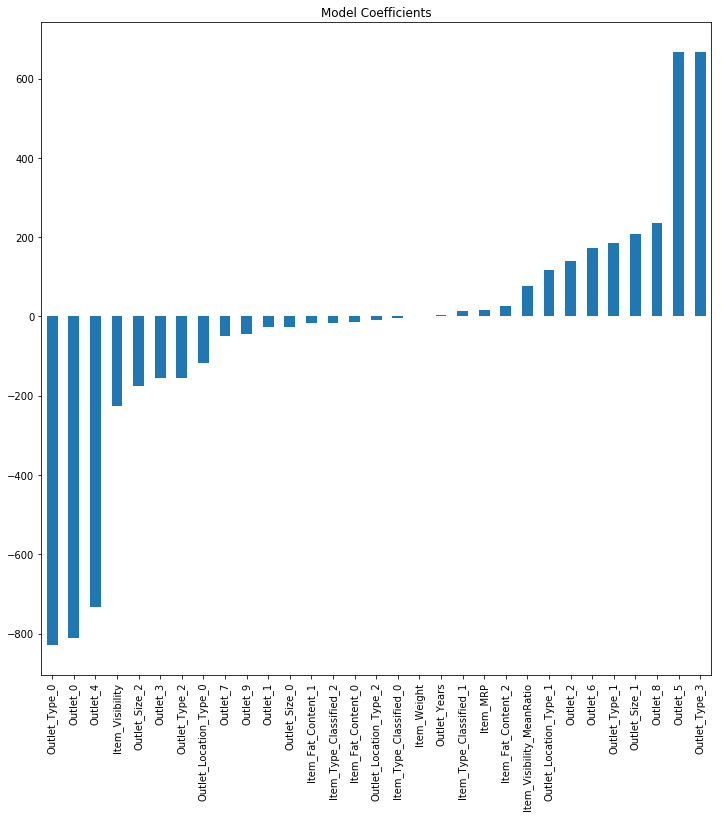

In [55]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'LinearRegression_model.csv')
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

###  The coefficients  are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge or Laso regression model


Model Report
RMSE : 1129
CV Score : Mean - 0.5584 | Std - 0.02705 | Min - 0.4945 | Max - 0.6127


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


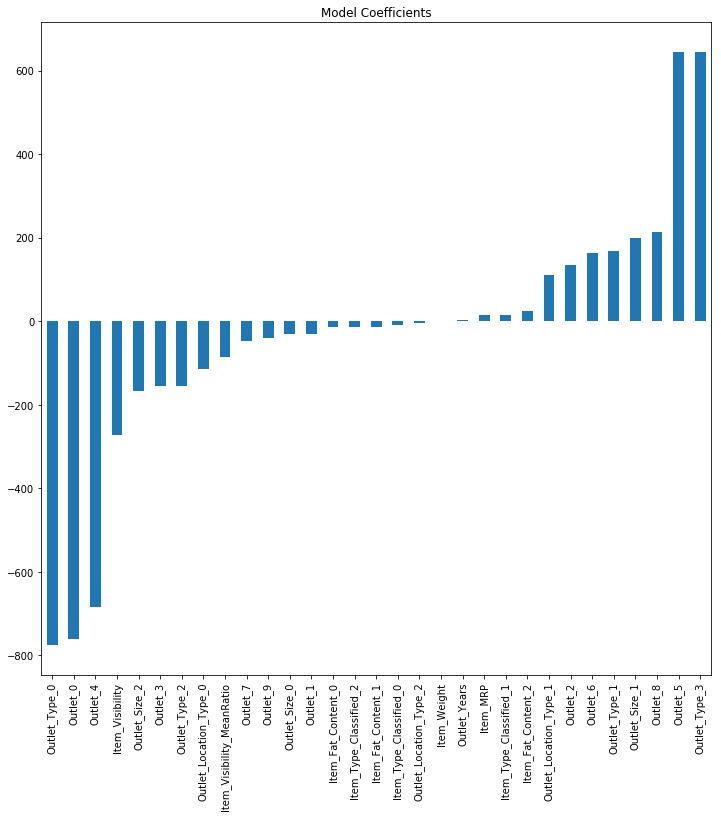

In [57]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'Ridge_model.csv')
plt.figure(figsize=(12,12))
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1073
CV Score : Mean - 0.5932 | Std - 0.03378 | Min - 0.5201 | Max - 0.648


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


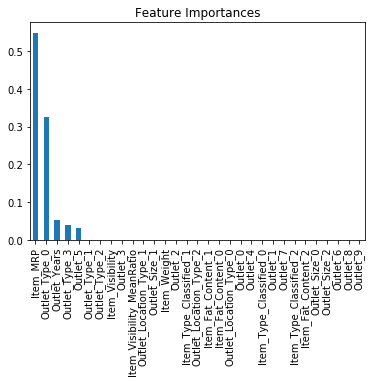

In [58]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg3, train, test, predictors, target, IDcol, 'RandomForestRegressor_model.csv')
alg3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1068
CV Score : Mean - 0.5938 | Std - 0.03416 | Min - 0.5192 | Max - 0.6501


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


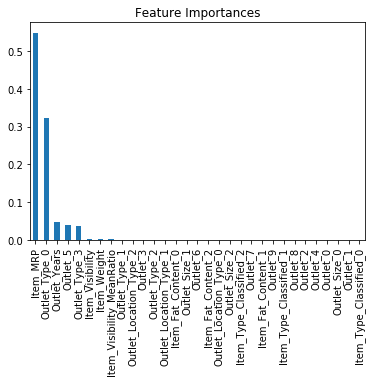

In [59]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg4 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg4, train, test, predictors, target, IDcol, 'RandomForestRegressor_Model2.csv')
coef6 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')